In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [3]:
n2019 = pd.read_csv("Nat2019.txt", header=None)

In [4]:
n2019.head()

,0
0,201901 11353 11 ...
1,201901 13053 11 ...
2,201901 08003 11 ...
3,201901 01304 11 ...
4,201901 14264 11 ...


In [5]:
def parse_natality(natalitydata, datadictionary):
    '''Take in pandas dataframe natalitydata and list-of-lists datadictionary
    (for example [[43, 44, "MATERNALAGE"]] ) and return a pandas dataframe (same 
    number of rows) with labeled columns  '''
    df = pd.DataFrame()
    for start, stop, column_name in datadictionary:
        # Get the first column (start)
        df[column_name] = natalitydata[0].str.get(start-1)
        # Get the remaining columns
        for i in range(1, stop-start + 1):
            df[column_name]=  df[column_name].str.cat(natalitydata[0].str.get(start-1+i))
    return df

In [6]:
dict2019 =[
    [13, 14, "MONTHOFBIRTH"],
    [19, 22, "TIMEOFBIRTH"],
    [75, 76, "MATERNALAGE"],
    [105, 106, "MATERNALRACE"],
    [23, 23, "DAYOFWEEKBIRTH"],
    [32, 32, "BIRTHPLACE"],
    [264, 264, "CIGSTHIRDTRIMESTER"],
    [287, 287, "BMI"]
]

In [7]:
df19 = parse_natality(n2019, dict2019)

In [8]:
times = df19["TIMEOFBIRTH"]
new_times = []
for i in times:
    remove = len(i) - 2
    new = str(i[:remove])
    new_times.append(new)


In [9]:
places = df19["BIRTHPLACE"]
new_places = []
for i in places:
    if i == '1':
        new_places.append("Hospital"),
    elif i == '2':
        new_places.append("Freestanding Birth Center"),
    elif i == '3':
        new_places.append("Home (intended)"),
    elif i == '4':
        new_places.append("Home (unintended)"),
    elif i == '5':
        new_places.append("Home (unknown if intended)"),
    elif i == '6':
        new_places.append("Clinic/Doctor's Office"),
    elif i == '7':
        new_places.append("Other"),
    elif i == '9':
        new_places.append("Unknown"),
    else:
        new_places.append("Unknown")

In [10]:
bmi = df19["BMI"]
new_bmi = []
for i in bmi:
    if i == '1':
        new_bmi.append('Underweight (<18.5)'),
    elif i == '2':
        new_bmi.append('Normal (18.5-24.9)'),
    elif i == '3':
        new_bmi.append('Overweight (25.0-29.9)'),
    elif i == '4':
        new_bmi.append('Obesity I (35.0-34.9)'),
    elif i == '5':
        new_bmi.append('Obesity II (35.0-39.9)'),
    elif i == '6':
        new_bmi.append('Extreme Obesity III (≥ 40.0)'),
    else:
        new_bmi.append('Unknown or not stated')

In [11]:
df19["Place of Birth"] = new_places
df19["Hour of Birth"] = new_times
df19["Maternal BMI"] = new_bmi

#df19["Birth Month"] = pd.to_numeric(df19["MONTHOFBIRTH"], errors="coerce")
#df19["Maternal Age"] = pd.to_numeric(df19["MATERNALAGE"], errors="coerce")
#df19["Birth Day of Week"] = pd.to_numeric(df19["DAYOFWEEKBIRTH"], errors="coerce")
#df19["Maternal Race"] = pd.to_numeric(df19["MATERNALRACE"], errors="coerce")

In [12]:
array = np.arange(0,24)
array2 = np.arange(1,25)

In [13]:
bmi_pivot = df19[["Hour of Birth", "Maternal BMI"]].pivot_table(index="Maternal BMI", columns="Hour of Birth", aggfunc=len).drop(columns = ['1 ', '2 ']).iloc[:,array2]
bmi_pivot


Hour of Birth,00,01,02,03,04,05,06,07,08,09,...,14,15,16,17,18,19,20,21,22,23
Maternal BMI,,,,,,,,,,,,,,,,,,,,,
Extreme Obesity III (≥ 40.0),5708.0,5184.0,4997.0,4596.0,4461.0,4627.0,4869.0,9232.0,17419.0,11512.0,...,10222.0,9518.0,9829.0,10228.0,9333.0,7815.0,8272.0,7623.0,6937.0,6409.0
Normal (18.5-24.9),49622.0,47984.0,46970.0,46421.0,46072.0,46554.0,47885.0,65323.0,87331.0,72456.0,...,74757.0,71409.0,71547.0,71891.0,66762.0,59064.0,59519.0,56786.0,54277.0,51890.0
Obesity I (35.0-34.9),17578.0,16383.0,15705.0,15441.0,15172.0,15588.0,15997.0,26038.0,39485.0,29497.0,...,28720.0,27095.0,27403.0,27667.0,25314.0,22497.0,22573.0,21510.0,20099.0,18480.0
Obesity II (35.0-39.9),8200.0,7706.0,7346.0,7368.0,7045.0,7041.0,7413.0,12978.0,21315.0,15152.0,...,14233.0,13585.0,13648.0,13966.0,12917.0,10937.0,11482.0,10760.0,9894.0,9177.0
Overweight (25.0-29.9),31372.0,29654.0,28948.0,28480.0,28333.0,28548.0,29134.0,43854.0,62761.0,49192.0,...,49156.0,46851.0,47193.0,47603.0,43731.0,38266.0,39456.0,36895.0,35305.0,33180.0
Underweight (<18.5),3631.0,3634.0,3593.0,3570.0,3535.0,3696.0,3673.0,4568.0,5940.0,5302.0,...,5496.0,5334.0,5325.0,5153.0,4729.0,4398.0,4427.0,4187.0,4127.0,3891.0
Unknown or not stated,3006.0,2906.0,2872.0,2899.0,2892.0,2884.0,2916.0,3353.0,5120.0,4500.0,...,4035.0,3818.0,3973.0,3811.0,3665.0,3182.0,3560.0,3337.0,3263.0,3114.0


<AxesSubplot:xlabel='Hour of Birth', ylabel='Maternal BMI'>

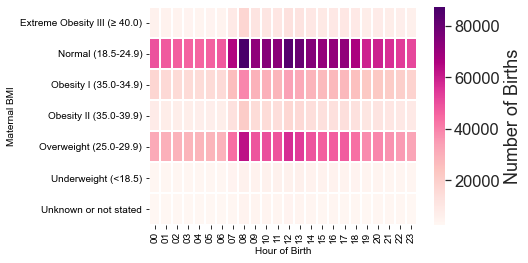

In [14]:
fig, ax = plt.subplots()
sns.set(rc = {'figure.figsize':(30,10)})
sns.set(font_scale=1.5)
sns.heatmap(bmi_pivot, cmap="RdPu", linewidths=1, cbar_kws={'label': 'Number of Births'})
#ax.set_title('Most Frequent Birthplaces Throughout the Day', fontsize=24)


In [15]:
#df19_pivot = df19[["Time of Birth", "Place of Birth"]].pivot_table(index="Time of Birth", columns="Place of Birth", aggfunc=len)
#df19_pivot_clean = df19_pivot.head(24)

df19_pivot_flip = df19[["Hour of Birth", "Place of Birth"]].pivot_table(index="Place of Birth", columns="Hour of Birth", aggfunc=len).drop(columns = ['1 ', '2 ']).iloc[:,array2]
df19_pivot_flip


Hour of Birth,00,01,02,03,04,05,06,07,08,09,...,14,15,16,17,18,19,20,21,22,23
Place of Birth,,,,,,,,,,,,,,,,,,,,,
Clinic/Doctor's Office,22.0,18.0,16.0,25.0,19.0,16.0,26.0,21.0,29.0,30.0,...,23.0,23.0,25.0,14.0,18.0,26.0,26.0,19.0,29.0,26.0
Freestanding Birth Center,910.0,996.0,979.0,944.0,953.0,983.0,908.0,874.0,861.0,801.0,...,743.0,795.0,782.0,866.0,853.0,950.0,832.0,891.0,972.0,999.0
Home (intended),1352.0,1454.0,1525.0,1574.0,1436.0,1431.0,1349.0,1289.0,1165.0,1112.0,...,1032.0,1018.0,1101.0,1090.0,1150.0,1147.0,1154.0,1239.0,1289.0,1395.0
Home (unintended),205.0,287.0,294.0,344.0,309.0,333.0,288.0,301.0,267.0,216.0,...,129.0,125.0,170.0,135.0,143.0,148.0,150.0,161.0,173.0,198.0
Home (unknown if intended),169.0,175.0,208.0,203.0,185.0,190.0,192.0,179.0,182.0,174.0,...,128.0,140.0,125.0,138.0,144.0,140.0,158.0,156.0,164.0,172.0
Hospital,116289.0,110353.0,107234.0,105506.0,104429.0,105788.0,108942.0,162527.0,236712.0,185109.0,...,184455.0,175409.0,176613.0,177960.0,164011.0,143614.0,146849.0,138503.0,131144.0,123193.0
Other,162.0,160.0,171.0,174.0,172.0,188.0,175.0,150.0,147.0,166.0,...,105.0,97.0,100.0,112.0,128.0,130.0,116.0,124.0,130.0,151.0
Unknown,8.0,8.0,4.0,5.0,7.0,9.0,7.0,5.0,8.0,3.0,...,4.0,3.0,2.0,4.0,4.0,4.0,4.0,5.0,1.0,7.0


Text(0.5, 1.0, 'Most Frequent Birthplaces Throughout the Day')

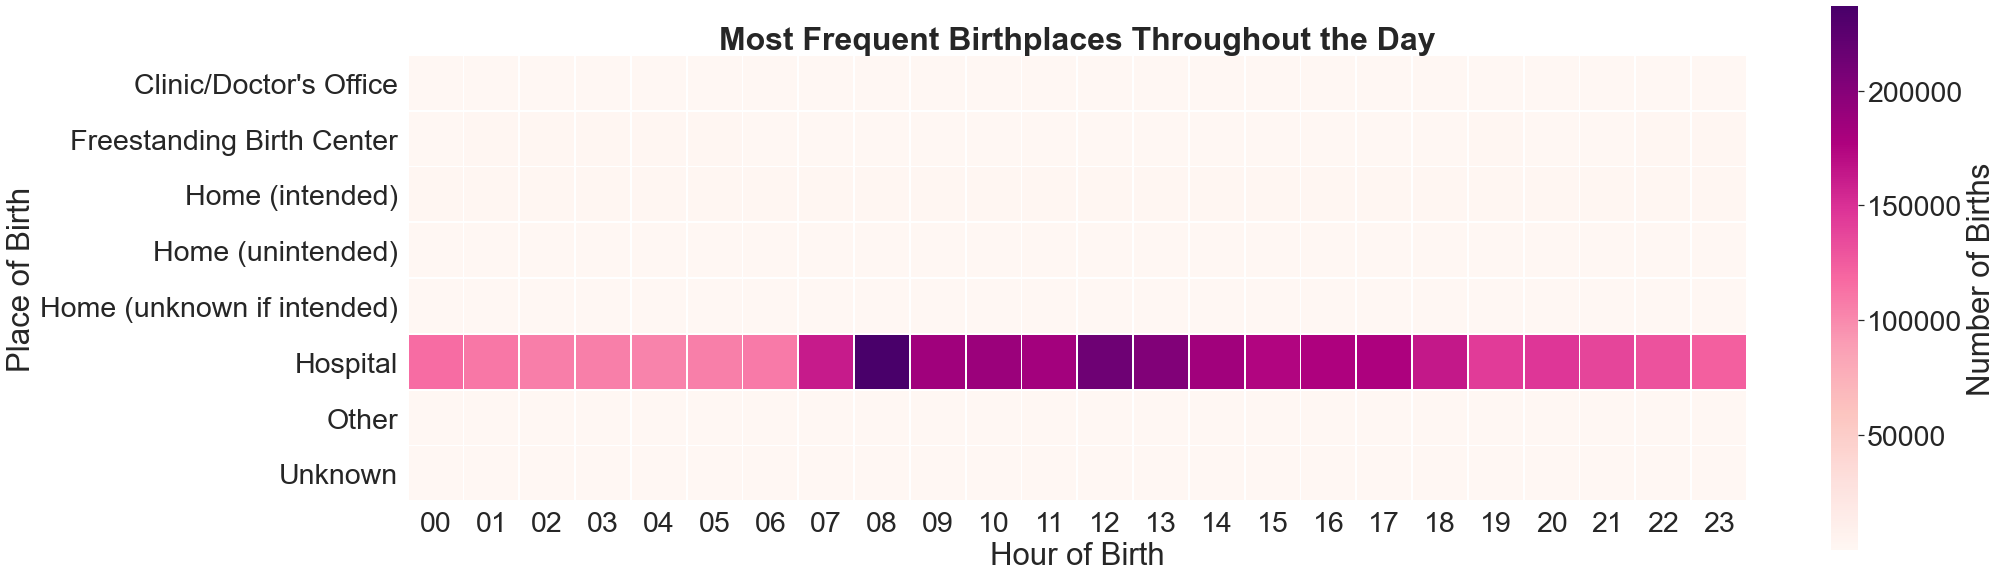

In [45]:
fig, ax = plt.subplots()
sns.set(rc = {'figure.figsize':(30,10)})
sns.set(font_scale=2.6)
sns.heatmap(df19_pivot_flip, cmap="RdPu", linewidths=1, cbar_kws={'label': 'Number of Births'}, square=True)
ax.set_title('Most Frequent Birthplaces Throughout the Day', fontsize=32, weight="bold")


In [17]:
df19_pivot_flip_nohospital = df19_pivot_flip.drop(['Hospital'])
df19_pivot_flip_nohospital

Hour of Birth,00,01,02,03,04,05,06,07,08,09,...,14,15,16,17,18,19,20,21,22,23
Place of Birth,,,,,,,,,,,,,,,,,,,,,
Clinic/Doctor's Office,22.0,18.0,16.0,25.0,19.0,16.0,26.0,21.0,29.0,30.0,...,23.0,23.0,25.0,14.0,18.0,26.0,26.0,19.0,29.0,26.0
Freestanding Birth Center,910.0,996.0,979.0,944.0,953.0,983.0,908.0,874.0,861.0,801.0,...,743.0,795.0,782.0,866.0,853.0,950.0,832.0,891.0,972.0,999.0
Home (intended),1352.0,1454.0,1525.0,1574.0,1436.0,1431.0,1349.0,1289.0,1165.0,1112.0,...,1032.0,1018.0,1101.0,1090.0,1150.0,1147.0,1154.0,1239.0,1289.0,1395.0
Home (unintended),205.0,287.0,294.0,344.0,309.0,333.0,288.0,301.0,267.0,216.0,...,129.0,125.0,170.0,135.0,143.0,148.0,150.0,161.0,173.0,198.0
Home (unknown if intended),169.0,175.0,208.0,203.0,185.0,190.0,192.0,179.0,182.0,174.0,...,128.0,140.0,125.0,138.0,144.0,140.0,158.0,156.0,164.0,172.0
Other,162.0,160.0,171.0,174.0,172.0,188.0,175.0,150.0,147.0,166.0,...,105.0,97.0,100.0,112.0,128.0,130.0,116.0,124.0,130.0,151.0
Unknown,8.0,8.0,4.0,5.0,7.0,9.0,7.0,5.0,8.0,3.0,...,4.0,3.0,2.0,4.0,4.0,4.0,4.0,5.0,1.0,7.0


Text(0.5, 1.0, 'Most Frequent Birthplaces Throughout the Day (Non-Hospital)')

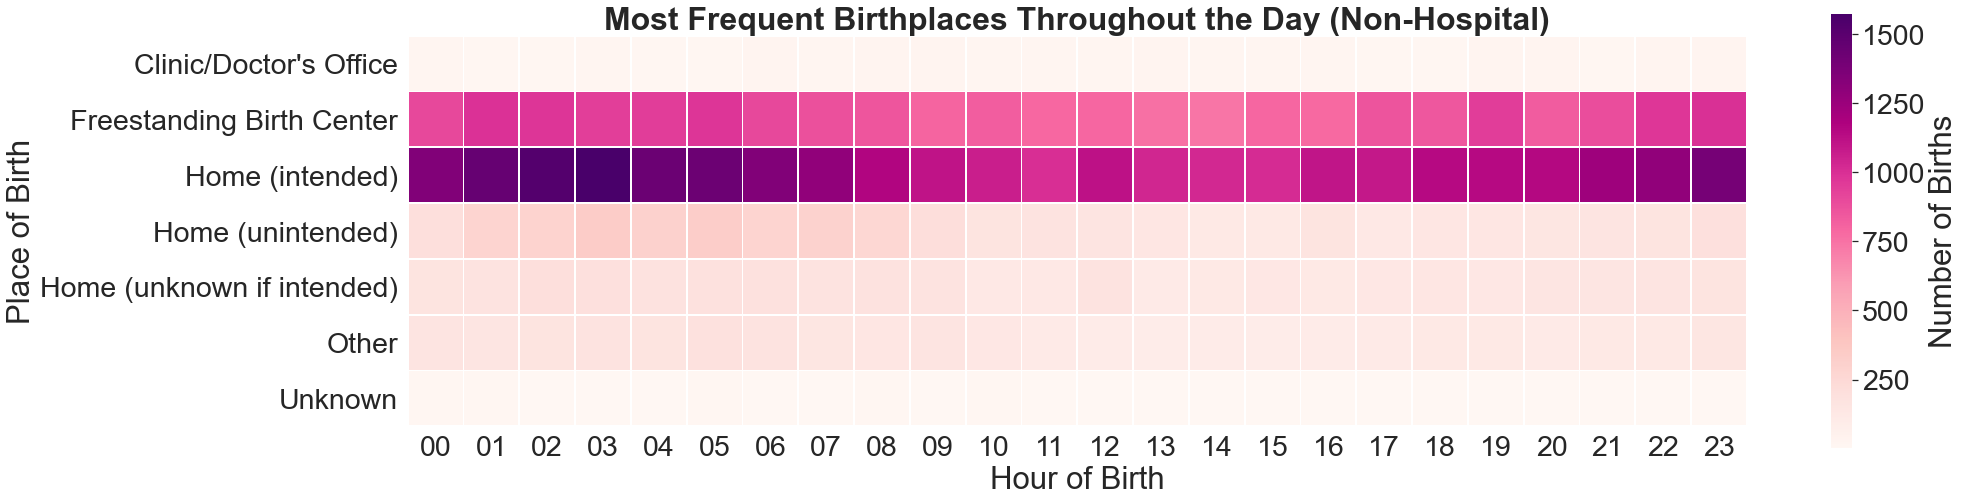

In [47]:
fig, ax = plt.subplots()
sns.set(rc = {'figure.figsize':(30,8)})
sns.set(font_scale=2.6)
sns.heatmap(df19_pivot_flip_nohospital, cmap="RdPu", linewidths=1, cbar_kws={'label': 'Number of Births'}, square=True)
ax.set_title('Most Frequent Birthplaces Throughout the Day (Non-Hospital)', fontsize=32, weight="bold")
